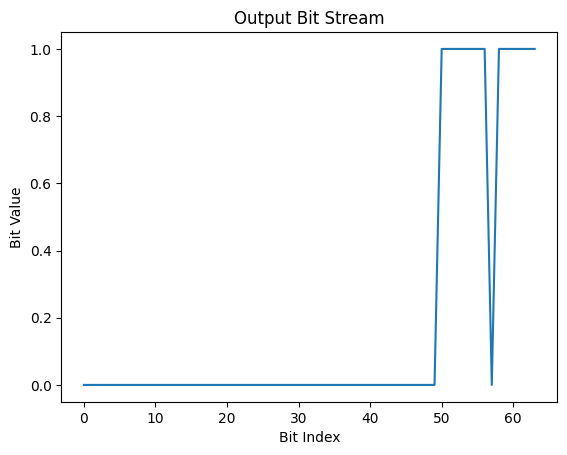

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the bit streams
length = 64

# Generate random bit streams for the inputs, weights, and biases
input_stream = np.random.randint(2, size=length)
weight_stream = np.random.randint(2, size=length)
bias_stream = np.random.randint(2, size=length)

# Perform the SC multiplication (bitwise AND)
mult_stream = np.bitwise_and(input_stream, weight_stream)

# Perform the SC addition (random selection)
add_stream = np.zeros(length, dtype=int)
for i in range(length):
    if np.random.rand() < 0.5:
        add_stream[i] = mult_stream[i]
    else:
        add_stream[i] = bias_stream[i]

# Perform the activation function (tanh FSM)
state = 0
output_stream = np.zeros(length, dtype=int)
for i in range(length):
    if add_stream[i] == 0:
        state = max(0, state - 1)
    else:
        state = min(7, state + 1)
    output_stream[i] = 1 if state >= 4 else 0

# Plot the output bit stream
plt.plot(output_stream)
plt.title('Output Bit Stream')
plt.xlabel('Bit Index')
plt.ylabel('Bit Value')
plt.show()


# pipelined version

input_value:  0.47265625 weight_value:  0.515625 bias_value:  0.5
output_value:  0.15234375


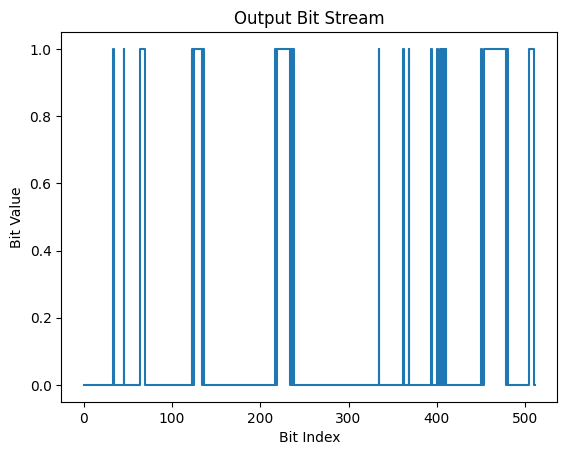

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the length of the bit streams
length = 16

# Generate random bit streams for the inputs, weights, and biases
input_stream = np.random.randint(2, size=length)
weight_stream = np.random.randint(2, size=length)
bias_stream = np.random.randint(2, size=length)

# calculate value of input, weight, bias
input_value, weight_value, bias_value = np.sum(input_stream)/length, np.sum(weight_stream)/length, np.sum(bias_stream)/length
print("input_value: ", input_value, "weight_value: ", weight_value, "bias_value: ", bias_value)

# Initialize the streams for the SC multiplication, SC addition, and activation
mult_stream = np.zeros(length, dtype=int)
add_stream = np.zeros(length, dtype=int)
output_stream = np.zeros(length, dtype=int)

# Initialize the state for the activation function
state = 0

# Perform the operations in a pipelined manner
for i in range(length):
    # Perform the SC multiplication (bitwise AND)
    mult_stream[i] = np.bitwise_and(input_stream[i], weight_stream[i])

    # Perform the SC addition (random selection)
    if i > 0:
        add_stream[i-1] = mult_stream[i-1] if np.random.rand() < 0.5 else bias_stream[i-1]

    # Perform the activation function (tanh FSM)
    if i > 1:
        if add_stream[i-2] == 0:
            state = max(0, state - 1)
        else:
            state = min(7, state + 1)
        output_stream[i-2] = 1 if state >= 4 else 0

# cal output value
output_value = np.sum(output_stream)/length
print("output_value: ", output_value)

# Plot the output bit stream
plt.plot(output_stream, drawstyle='steps-post')
plt.title('Output Bit Stream')
plt.xlabel('Bit Index')
plt.ylabel('Bit Value')
plt.show()


In [29]:
def tanh(input):
    return (np.exp(input) - np.exp(-input)) / (np.exp(input) + np.exp(-input))
tanh(0.47265625 * 0.515625 + 0.5)

0.6313834576692161